### TITANIC DATA: EDA

In [84]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Data loading

In [14]:
# Load the test dataset
file_path_test = r'C:\Users\Admin\OneDrive\Documents\GitHub\ds_02\-PRODIGY_DS_02\test.csv'
test_df = pd.read_csv(file_path_test)
# Load the train dataset
file_path_train = r'C:\Users\Admin\OneDrive\Documents\GitHub\ds_02\-PRODIGY_DS_02\train.csv'
train_df = pd.read_csv(file_path_train)

In [100]:
# Merge the datasets
combined_df = pd.concat([train_df, test_df], ignore_index=True)
combined_df.shape

(1309, 12)

In [12]:
combined_df.to_excel(r'C:\Users\Admin\OneDrive\Documents\GitHub\ds_02\-PRODIGY_DS_02\combined_data.xlsx', index=False)


In [13]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  dataset      1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 133.1+ KB


| **Attribute**  | **Type**    | **Description**                                                                                                                                               | **Possible Values**                                                                                                                                   |
|----------------|-------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------|
| **PassengerId**| `int64`     | Unique identifier for each passenger.                                                                                                                         | Sequential integer values.                                                                                                                           |
| **Survived**   | `float64`   | Indicates whether the passenger survived or not.                                                                                                              | `1` = Survived, `0` = Did not survive                                                                                                                 |
| **Pclass**     | `int64`     | Class of the ticket the passenger purchased.                                                                                                                 | `1` = First class, `2` = Second class, `3` = Third class                                                                                           |
| **Name**       | `object`    | Full name of the passenger.                                                                                                                                   | String (e.g., "John Doe"). Can contain titles like Mr., Mrs., Miss.                                                                                 |
| **Sex**        | `object`    | Gender of the passenger.                                                                                                                                      | `male`, `female`                                                                                                                                     |
| **Age**        | `float64`   | Age of the passenger in years.                                                                                                                                | Numeric (e.g., 22.0, 35.0). Missing values might occur.                                                                                              |
| **SibSp**      | `int64`     | Number of siblings or spouses the passenger was traveling with.                                                                                             | Non-negative integers (e.g., `0`, `1`, `2`).                                                                                                        |
| **Parch**      | `int64`     | Number of parents or children the passenger was traveling with.                                                                                             | Non-negative integers (e.g., `0`, `1`, `2`).                                                                                                        |
| **Ticket**     | `object`    | The ticket number.                                                                                                                                           | String (e.g., "A/5 21171"). Can be used for grouping or exploration of ticket pricing.                                                              |
| **Fare**       | `float64`   | The amount of money paid for the ticket.                                                                                                                      | Numeric (e.g., 7.25, 71.2833).                                                                                                                       |
| **Cabin**      | `object`    | The cabin the passenger stayed in.                                                                                                                            | String (e.g., "C85"). Many missing values. Could be used to extract deck information or dropped.                                                   |
| **Embarked**   | `object`    | The port where the passenger boarded the Titanic.                                                                                                            | `C` = Cherbourg, `Q` = Queenstown, `S` = Southampton                                                                           |


In [16]:
combined_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,dataset
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


### Handling Missing Values  

In [15]:
#Checkimg missing values
combined_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dataset           0
dtype: int64

In [53]:
combined_df["Survived"].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [54]:
combined_df.dropna().shape #


(183, 15)

-183 rows and 12 columns so it is not good to drop all the rows with missing values as we are losing huge amount of data. So,
- Survived attribute has 418 null values. And it is our Target Attribute we can't Drop it. What we can do is Dropping the Null Values by sub setting Survived attribute

- **Drop rows with missing values in the Survived column**

In [109]:
combined_df.dropna(subset=['Survived'], inplace=True)
combined_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now let's see that can we handle missing values column wise as age column has 177 missing values

### Imputation Techniques Or Imputation Missing Values 

- **Mean Imputation**

In [110]:
combined_df.shape

(891, 12)

#### Handling Missing Values Of Age

<Axes: xlabel='Age', ylabel='Count'>

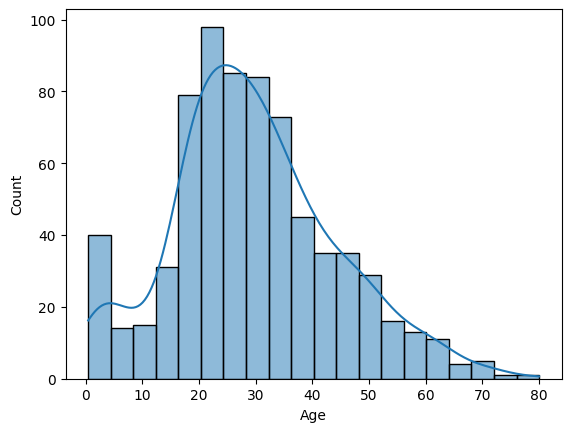

In [111]:
sns.histplot(combined_df['Age'],kde=True)

- Most of the passenger age is between 15 and 37
- The distribution of age looks like similar to that of Normal Distribution.
so we can replace the null values with the mean of the age column! As Mode,Median and mode are all most the same.

##### - Mean Imputation

In [119]:
combined_df['Age']=combined_df['Age'].fillna(combined_df['Age'].mean()).round(2)
combined_df['Age'].isnull().sum()

0

In [117]:
combined_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_mean         0
dtype: int64

- **Dropping Cabin**
- As it has large number null vales

In [120]:
combined_df.drop(columns=['Cabin'], inplace=True)

In [121]:
#combined_df=combined_df.drop(columns=["Age", "age_mean"], inplace=True)
combined_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Age_mean       0
dtype: int64

### Handling  Missing Values of Emabrked
- **Mode Imputation**

In [122]:
combined_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [123]:
combined_df["Embarked"].isna().sum()

2

In [124]:
combined_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [126]:
mode_value=combined_df[combined_df['Embarked'].notna()]['Embarked'].mode()[0]
mode_value
combined_df['Embarked'] = combined_df['Embarked'].fillna(mode_value)
combined_df['Embarked'].isna().sum()

0

In [127]:
combined_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Age_mean       0
dtype: int64

## EDA

- **Basic Statistics**

In [128]:
combined_df.drop(columns=['PassengerId'], inplace=True)

In [129]:
combined_df.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare,Age_mean
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699293,0.523008,0.381594,32.204208,29.699293
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,13.002015
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,22.000000
50%,0.000000,3.000000,29.700000,0.000000,0.000000,14.454200,29.700000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,35.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


1. Survived

    Mean: 0.384, indicating 38.4% of the passengers survived.
    Standard Deviation: 0.487, suggesting a binary variable (0 = died, 1 = survived).
    Range: The minimum is 0, and the maximum is 1, showing two possible outcomes: survival or not.

- A significant portion (around 62%) of passengers did not survive.
2. Pclass (Passenger Class)

    Mean: 2.31, suggesting most passengers traveled in 2nd or 3rd class.
    Range: Values range from 1 (1st class) to 3 (3rd class).
    Distribution: The standard deviation (0.836) indicates more passengers in lower classes.

- Higher-class passengers likely had better survival chances (to confirm through further analysis).
  
  3. SibSp (Siblings/Spouses Aboard)

    Mean: 0.523, indicating most passengers had less than one sibling or spouse aboard.
    Range: From 0 (traveling alone) to 8 (large families aboard).
    Distribution: The standard deviation (1.10) suggests a skew toward smaller family sizes.

Insight: Most passengers likely traveled alone or with one family member.
4. Parch (Parents/Children Aboard)

    Mean: 0.381, meaning most passengers had less than one parent or child aboard.
    Range: From 0 (traveling alone) to 6.
    Distribution: A standard deviation of 0.806 shows a skew toward passengers traveling alone or with fewer family members.

Insight: Like SibSp, most passengers traveled with small families or alone.
5. Fare

    Mean: 32.20, showing the average ticket price.
    Range: From 0 (likely freebies or crew members) to 512.33 (luxury fares).
    Distribution: A high standard deviation (49.69) suggests a wide range of ticket prices.

Insight: Ticket prices likely correlate with Pclass and possibly survival rates.
6. Age_mean (Passenger Age)

    Mean: 29.7, indicating the average passenger was about 30 years old.
    Range: From 0.42 (infants) to 80 years old.
    Distribution: The standard deviation (13.00) suggests a broad age distribution.

Insight: Younger passengers (e.g., children) may have had better survival rates (to be confirmed).
Key Insights:

    - Survival Rate: Only 38.4% survived, suggesting that most passengers did not survive.
    - Passenger Class: A majority traveled in 2nd or 3rd class, which could impact survival outcomes.
    - Family Size: Most passengers traveled alone or with small families, influencing survival chances.
    - Fare: Higher ticket prices likely correlate with 1st class and potentially higher survival rates.
    - Age: The passenger ages are diverse, with children and younger passengers potentially having higher survival rates.

##### Distribution of target variable (Survived):

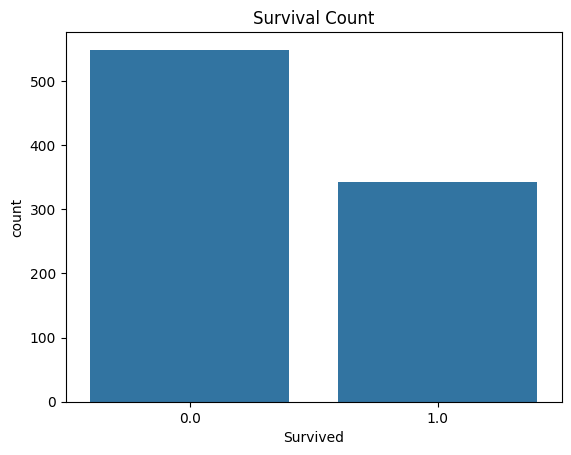

In [94]:
sns.countplot(x='Survived', data=combined_df)
plt.title('Survival Count')
plt.show()


- The count for those who did not survive is higher, which reflects the historical event.

#### Survival by Gender

<Axes: xlabel='Sex', ylabel='Survived'>

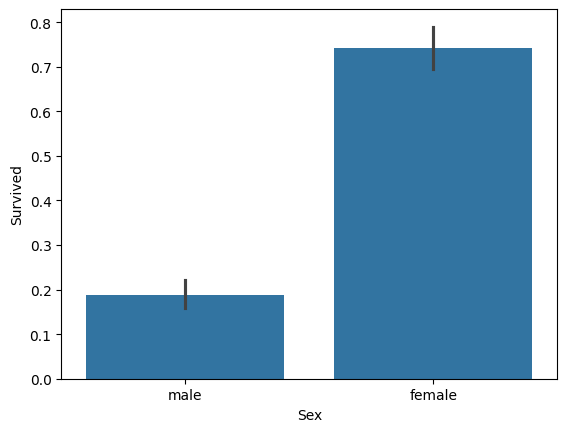

In [95]:
sns.barplot(x='Sex', y='Survived', data=combined_df)


- The higher number of female survivors compared to male survivors on the Titanic is likely due to the "women and children first" evacuation policy, which prioritized women and children for lifeboat space. Additionally, social norms at the time expected men to remain behind, increasing the survival chances of women.

<Axes: xlabel='Pclass', ylabel='Survived'>

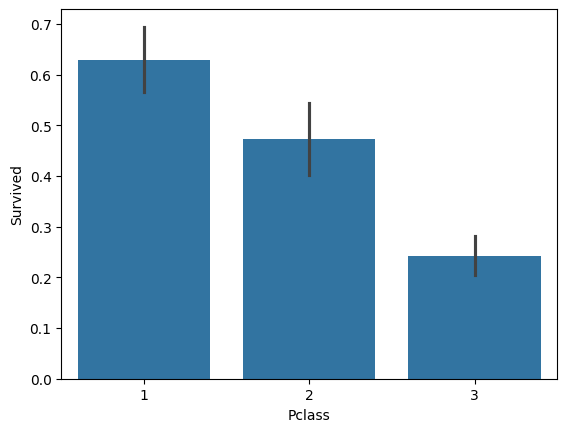

In [96]:
sns.barplot(x='Pclass', y='Survived', data=combined_df)


- The bar chart shows survival rates by passenger class (Pclass) on the Titanic:
    - Pclass 1: Highest survival rate (~60-70%).
    - Pclass 2: Moderate survival rate (~50%).
    - Pclass 3: Lowest survival rate (~20-30%).
- Survival chances were higher for passengers in higher classes, likely due to better access to lifeboats and resources.

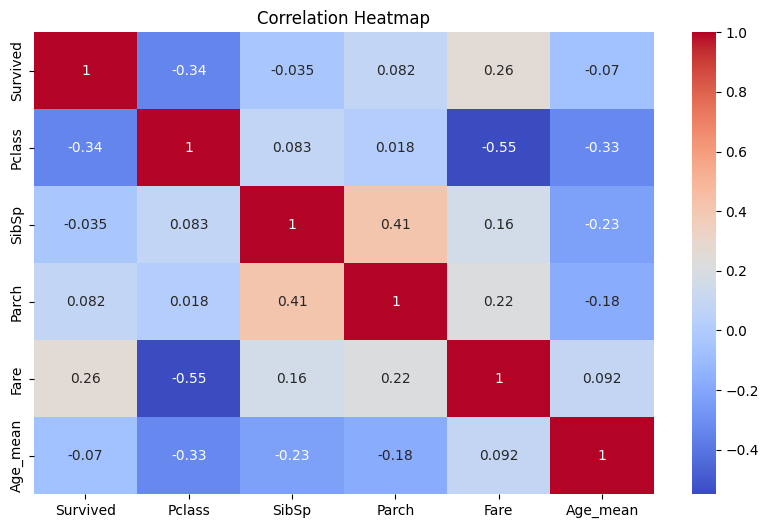

In [99]:
# Select only numeric columns
numeric_df = combined_df.select_dtypes(include='number')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



**The correlation heatmap illustrates the relationships between numeric variables in the dataset. Here’s the interpretation:**

    - Survived vs Pclass:
        Correlation: -0.34 (negative).
        Indicates that passengers in higher classes (lower Pclass number) were more likely to survive.

    - Survived vs Fare:
        Correlation: 0.26 (positive).
        Passengers who paid higher fares had a slightly higher likelihood of survival.

    - Survived vs SibSp/Parch:
        Correlation: Very weak (close to 0).
        Having siblings, spouses, or parents on board had little influence on survival.

    - Pclass vs Fare:
        Correlation: -0.55 (negative).
        Passengers in higher classes (lower Pclass) paid significantly more for their tickets.

    - SibSp vs Parch:
        Correlation: 0.41 (moderate positive).
        Passengers traveling with siblings/spouses were also more likely to travel with parents/children.

    - Age_mean vs Pclass:
        Correlation: -0.33 (negative).
        Younger passengers were more likely to be in lower classes (higher Pclass).

**Key Insights:**

    Survival was moderately influenced by socioeconomic factors (Pclass, Fare).
    Family connections (SibSp, Parch) showed weak correlations with survival.
    Higher class and wealthier passengers had better survival outcomes.

### Number of Survivors and Non-Survivors by Age Group'

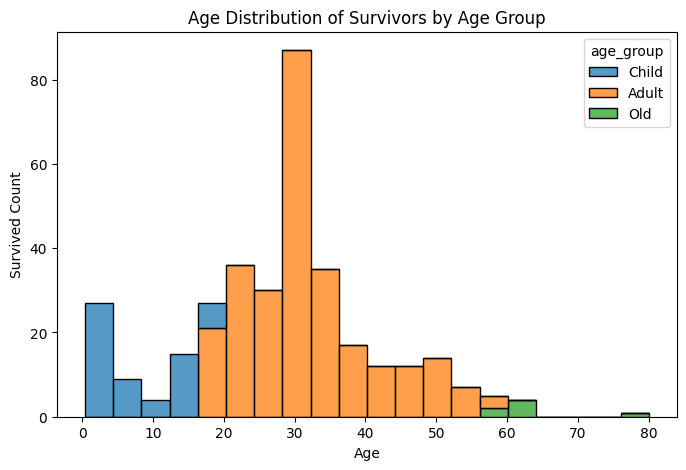

In [133]:
# Define age groups
combined_df['age_group'] = pd.cut(combined_df['Age'], 
                                bins=[0, 18, 60, 100], 
                                labels=['Child', 'Adult', 'Old'], 
                                right=False)

# Filter data for survivors (Survived == 1)
survived_df = combined_df[combined_df['Survived'] == 1]

# Create a histogram to show the survival distribution across different age groups
plt.figure(figsize=(8, 5))
sns.histplot(data=survived_df, x='Age', hue='age_group', multiple='stack', kde=False)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Survived Count')
plt.title('Age Distribution of Survivors by Age Group')

# Show the plot
plt.show()


- **Adults**: A higher proportion of adult passengers survived.
- **Children**: Despite a high number of survivors, the proportion of children who survived is lower compared to adults.
- **Olds**: The lowest proportion of survival.

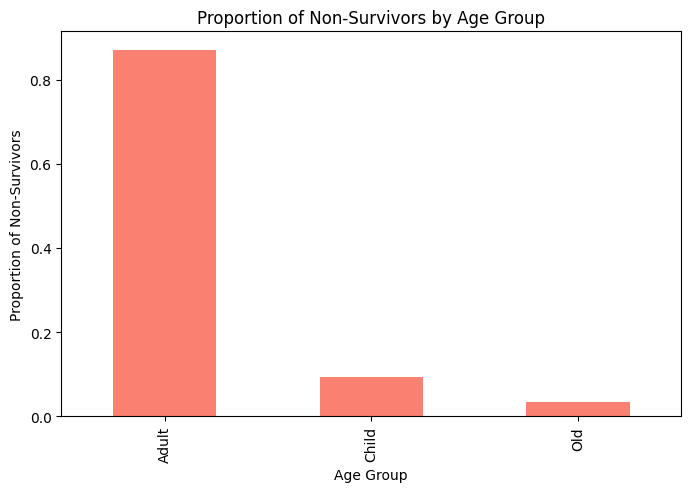

In [135]:
# Filter data for non-survivors (Survived == 0)
non_survived_df = combined_df[combined_df['Survived'] == 0]

# Calculate the proportion of non-survivors by age group
age_group_non_survival_proportion = non_survived_df['age_group'].value_counts(normalize=True)

# Plot the proportions as a bar plot
plt.figure(figsize=(8, 5))
age_group_non_survival_proportion.plot(kind='bar', color='salmon')

# Set plot labels and title
plt.xlabel('Age Group')
plt.ylabel('Proportion of Non-Survivors')
plt.title('Proportion of Non-Survivors by Age Group')

# Show the plot
plt.show()


-Adults: A higher proportion of adult passengers aren't survived.
Children: Despite a high number of survivors, the proportion of children who survived is lower compared to adults.
Olds: The lowest proportion of survival.